<a href="https://colab.research.google.com/github/ENyawera/Housing-Prices-Prediction/blob/main/Bigmart_Sales_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__






## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

## Get the Dataset

You can download the dataset manually from [this link](https://drive.google.com/file/d/1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8/view?usp=sharing) or use the following code snippet to load in in google colab directly.

In [4]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 129MB/s]


In [5]:
# prompt: import pandas as pd

import pandas as pd

# Load the dataset
df = pd.read_csv('sales_prediction.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# prompt: df.columns

print(df.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


Prepare training and test datasets

Sales is our target

In [7]:
X= df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [8]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [9]:
y_train.head()

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

Data cleaning,EDA & feature engineering


In [10]:
X_train_copy=X_train.copy()

In [11]:
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [12]:
X_train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [54]:
# variable for numerical and categorical columns
def split_columns(df):
    # Extract numerical columns
    num_cols = df.select_dtypes(exclude=['object'])

    # Extract categorical columns
    cat_cols = df.select_dtypes(include=['object'])

    return num_cols, cat_cols


num_cols, cat_cols = split_columns(X_train_copy)



# num_cols = X_train_copy.select_dtypes(exclude=['object'])
# cat_cols = X_train_copy.select_dtypes(include=['object'])


In [55]:
num_cols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,8.60,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


check outliers

In [15]:
num_cols.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [16]:
num_cols.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
def visualize_numeric_feature(data_frame,col_name):
  fig,ax= plt.subplots(1,2, figsize= (12,5))
  sns.histplot(data=data_frame, x=col_name, ax=ax[0]);
  sns.boxplot(data=data_frame, y=col_name, ax=ax[1]);


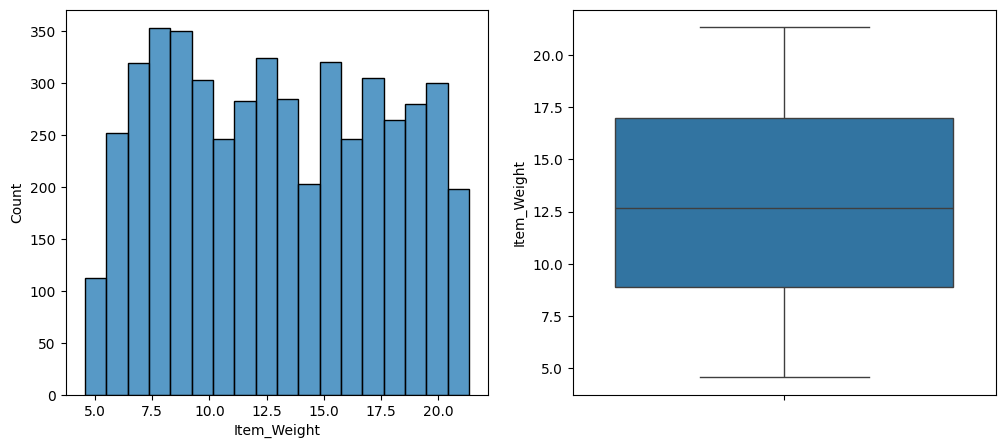

In [19]:
visualize_numeric_feature(X_train_copy, 'Item_Weight')

Data has overall uniform distribution not many outliers

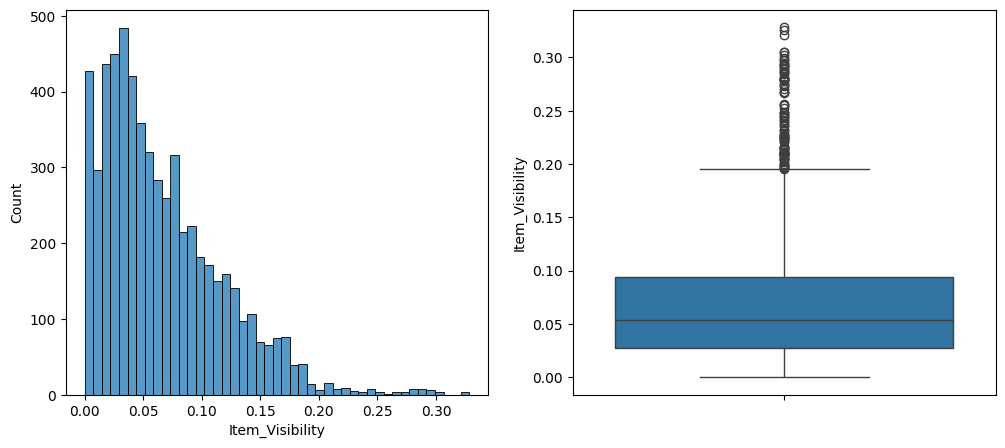

In [20]:
visualize_numeric_feature(X_train_copy, 'Item_Visibility')

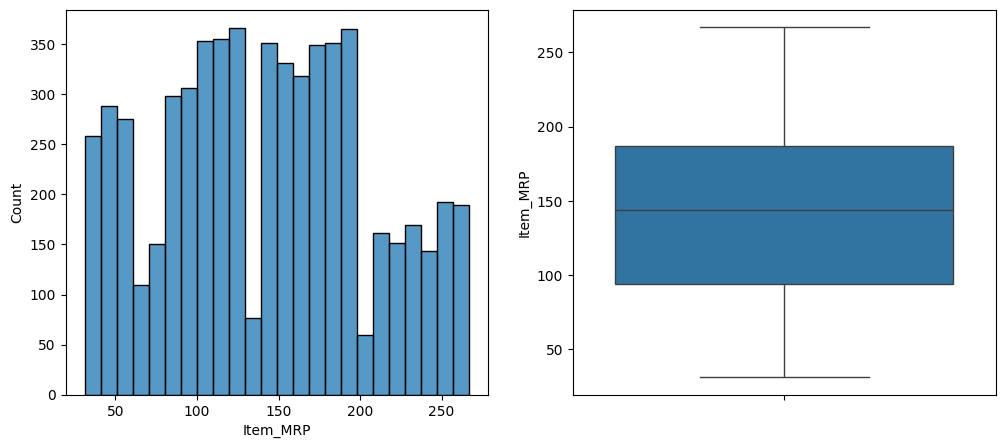

In [21]:
visualize_numeric_feature(X_train_copy, 'Item_MRP')

Multimodal distribution

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

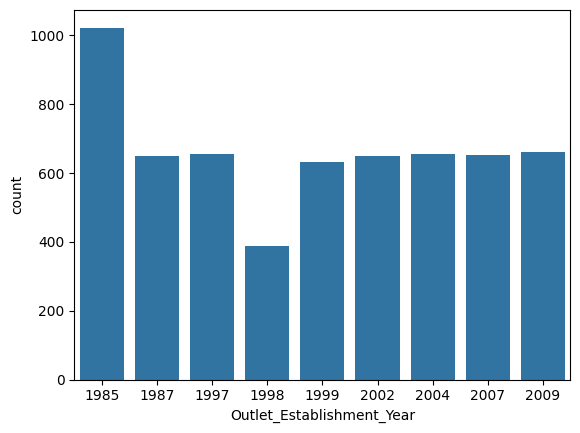

In [22]:
sns.countplot(data=X_train_copy, x= 'Outlet_Establishment_Year')

Years are discrete numerical cols

In [23]:
cat_cols.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [24]:
cat_cols.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [25]:
cat_cols.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [26]:
# value counts for cols in cat cols

for col in cat_cols:
  print(f'{col}: {X_train_copy[col].value_counts()}')


Item_Identifier: NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64
Item_Fat_Content: Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64
Item_Type: Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64
Outlet_Identifier: OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_

Data preprocessing, Feature engineering
Step 1: Create high level item types since item identifier has too many features

In [27]:
X_train_copy['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [28]:
def create_item_type(data_frame):
  data_frame['Item_Type']= data_frame['Item_Identifier'].str[:2]
  data_frame['Item_Type']= data_frame['Item_Type'].map({'FD':'Food',
                                                        'NC':'Non_Consumables',
                                                        'DR':'Drink'})
  return data_frame

In [29]:
X_train_copy= create_item_type(X_train_copy)
X_train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [30]:
# .columns

X_train_copy.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Step 2: Dealing with missing valueas

In [31]:
X_train_copy[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])


,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [32]:
X_train_copy[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])


,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [33]:
# Fill missing value for Item_weight
# 1.mapping of item id _weight and fill missing values
# 2.if new item fill using median weight

Item_Id_Weight_Pivot= X_train_copy.pivot_table(values= 'Item_Weight',index= 'Item_Identifier').reset_index()
Item_Id_Weight_Mapping=dict(zip(Item_Id_Weight_Pivot['Item_Identifier'],Item_Id_Weight_Pivot['Item_Weight']))
list(Item_Id_Weight_Mapping.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [34]:
Item_Type_Weight_Pivot= X_train_copy.pivot_table(values= 'Item_Weight',index= 'Item_Type', aggfunc='median').reset_index()
Item_Type_Weight_Mapping=dict(zip(Item_Type_Weight_Pivot['Item_Type'],Item_Type_Weight_Pivot['Item_Weight']))
Item_Type_Weight_Mapping.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)])

In [35]:
def impute_item_weight(data_frame):
  # option_1
  data_frame.loc[:,'Item_Weight']= data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(Item_Id_Weight_Mapping))
  data_frame.loc[:,'Item_Weight']= data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(Item_Type_Weight_Mapping))

  return data_frame

In [36]:
X_train_copy= impute_item_weight(X_train_copy)

In [37]:
X_train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [38]:
X_train_copy.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [39]:
Outlet_type_size_pivot=X_train_copy.pivot_table(values='Outlet_Size',index='Outlet_Type',
                         aggfunc=(lambda x: x.mode().iloc[0])).reset_index()
Outlet_type_size_mapping=dict(zip(Outlet_type_size_pivot['Outlet_Type'],Outlet_type_size_pivot['Outlet_Size']))
Outlet_type_size_mapping

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [40]:
def impute_outlet_size(data_frame):
  data_frame.loc[:,'Outlet_Size']= data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(Outlet_type_size_mapping))

  return data_frame

In [41]:
X_train_copy= impute_outlet_size(X_train_copy)

In [42]:
X_train_copy.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [43]:
# 4. standardize item fat content
def standardize_item_fat_cantent(data_frame):
  data_frame['Item_Fat_Content']= data_frame['Item_Fat_Content'].replace({
                                            'Low Fat': 'Low_Fat',
                                            'LF': 'Low_Fat',
                                            'low fat': 'Low_Fat',
                                            'reg': 'Regular'
  })
  return data_frame

In [44]:
X_train_copy = standardize_item_fat_cantent(X_train_copy)
X_train_copy['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

In [45]:
# change fat content of non consumables
def correct_item_fat_content(data_frame):
  data_frame.loc[data_frame['Item_Type']=='Non_Consumables','Item_Fat_Content']= 'Non_Edible'

  return data_frame


In [46]:
X_train_copy = correct_item_fat_content(X_train_copy)
X_train_copy.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [47]:
X_train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


Prepare data for Modelling

In [48]:
def prepare_dataset(data_frame):
  # step1
  data_frame = create_item_type(data_frame)
  # step2
  data_frame = impute_item_weight(data_frame)
  # step3
  data_frame = impute_outlet_size(data_frame)
  # step4
  data_frame = standardize_item_fat_cantent(data_frame)
  # step5
  data_frame = correct_item_fat_content(data_frame)

  return data_frame

In [53]:
X_train = prepare_dataset(X_train)
X_test = prepare_dataset(X_test)

X_train.isnull().sum() , X_test.isnull().sum()


(Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 dtype: int64,
 Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 dtype: int64)

In [57]:
#one hot encode categorical data
from sklearn.preprocessing import OneHotEncoder

num_feats, cat_feats = split_columns(X_train)

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_cols)

OneHotEncoder(handle_unknown='ignore')

In [58]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

X_train_encoded = pd.DataFrame(ohe.transform(cat_feats).toarray(), columns=ohe_feature_names)

X_train_encoded.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [59]:
X_train_final = pd.concat([num_feats,X_train_encoded],axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,7.72,0.147904,116.6466,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
655,19.75,0.014301,103.0332,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,8.60,0.054221,129.1310,1985.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2537,19.35,0.118342,222.6088,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,18.35,0.092150,184.8266,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [61]:
num_feats_test, cat_feats_test = split_columns(X_test)
X_test_encoded = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test,X_test_encoded],axis=1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.300,0.026300,79.4302,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2957,7.930,0.071136,42.7086,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7031,14.500,0.041313,42.0454,1999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,13.000,0.044767,173.7054,1985.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
856,10.195,0.012456,197.5110,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Modeling

In [62]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np


In [ ]:
# for model in models:
#   model.fit(X_train_final, y_train)
#   y_pred = model.predict(X_test_final)
#   score = np.sqrt(mean_squared_error(y_test, y_pred))
#   print(f'{model.__class__.__name__} score: {score}')


In [ ]:
def train_and_eval_model(model,X_train,y_train,cv=5):
  cv_results = cross_val_score(model,X_train,y_train,cv=cv,scoring=('r2','neg_root_mean_squared_error'),)
  print('Model:', model)
  r2_scores = cv_results['test_r2']
  print('R2 CV score:',r2_scores)
